# Lab 


#### 2.2.1 Virkningsgrad

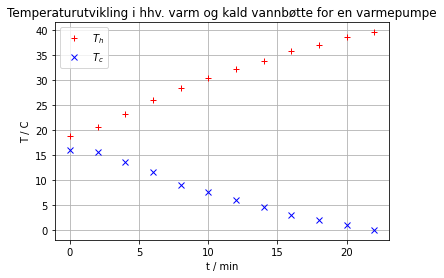

In [22]:
import numpy as np
import matplotlib.pyplot as plt

c = 4.2 * 1000 # kJ / kgK
rho = 1.00 # vannets massetetthet kg/L
V = 4 # 4 liter
m = rho * V
P = 100 # elektrisk effekt inn til kompressor i watt


t = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
T_h = np.array([18.7, 20.5, 23.2, 26, 28.3, 30.3, 32.1, 33.7, 35.7, 37, 38.5, 39.5])
T_c = np.array([16, 15.5, 13.5, 11.5, 9, 7.5, 6, 4.5, 3, 2, 1, 0])

plt.title('Temperaturutvikling i hhv. varm og kald vannbøtte for en varmepumpe')
plt.plot(t, T_h, '+', label=r'$T_h$', color='r')
plt.plot(t, T_c, 'x', label=r'$T_c$', color='b')
plt.xlabel('t / min')
plt.ylabel('T / C')
plt.grid()
plt.legend()
plt.show()


[  0.  151.2 226.8 235.2]
[0.         4.1        2.39175258 1.79310345]


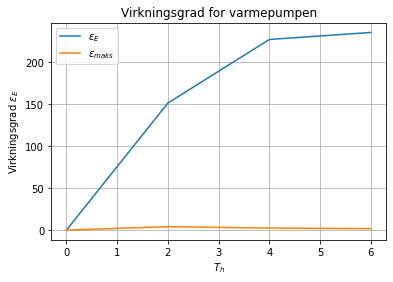

In [23]:

epsilon_E = np.zeros(4)
epsilon_maks = np.zeros(4)

for i in range(1, 4):
    dT_h = T_h[i] - T_h[i-1]
    dT = t[i] - t[i-1]
    epsilon_E[i] = (c*m*dT_h) / (P * dT)
    epsilon_maks[i] = T_h[i] / (T_h[i] - T_c[i])

print(epsilon_E)
print(epsilon_maks)

plt.title('Virkningsgrad for varmepumpen')
plt.plot(t[0:4], epsilon_E, label=r'$\epsilon_E$')
plt.plot(t[0:4], epsilon_maks, label=r'$\epsilon_{maks}$')
plt.xlabel(r'$T_h$')
plt.ylabel(r'Virkningsgrad $\epsilon_E$')
plt.grid()
plt.legend()
plt.show()

#### 2.2.2 Kretsløpsanalyse

**4.** Størst utvekling av energi er mellom 2 og 3

**5.** $W = 442 - 417 = 25kJ / kg$

**6.** $\epsilon = \frac{Q}{W} = \frac{38K}{25kJ / kg} = 1.52 kg K / kJ$.
Større virkningsgrad en målt verdi, men lavere enn Carnot-virkningsgraden.



#### 2.3.4 Analyse

Plott temperaturutviklingen i de to bøttene. Bruk samme akser som p˚a grafen i
Figur 2.6. Inkluder m˚aleusikkerheten dersom usikkerhetsstolpene er synlige.

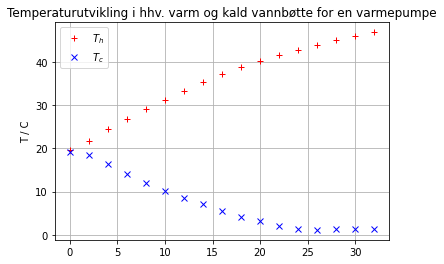

In [24]:

t = np.arange(0, 34, 2)

T_c = np.array([19.1, 18.5, 16.3, 14.1, 12, 10.2, 8.5, 7, 5.4, 4.2, 3.1, 2.0, 1.2, 1.1, 1.2, 1.2, 1.2])
T_h = np.array([19.6, 21.6, 24.4, 26.8, 29.1, 31.2, 33.2, 35.3, 37.2, 38.9, 40.3, 41.6, 42.9, 44, 45, 46, 46.9])

plt.title('Temperaturutvikling i hhv. varm og kald vannbøtte for en varmepumpe')
plt.plot(t, T_h, '+', label=r'$T_h$', color='r')
plt.plot(t, T_c, 'x', label=r'$T_c$', color='b')
plt.ylabel('T / C')
plt.grid()
plt.legend()
plt.show()


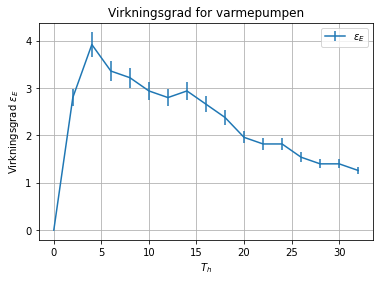

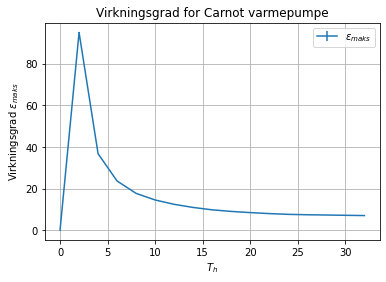

epsilon_E 2.939999999999997 +- 0.19185424015856964
epsilon_maks 14.492857142857142 +- 0.0007082846739000253


In [25]:

epsilon_E = np.zeros(len(t))
delta_epsilon_E = np.zeros(len(t))
epsilon_maks = np.zeros(len(t))
delta_epsilon_maks = np.zeros(len(t))

for i in range(1, len(t)):
    dT_h = T_h[i] - T_h[i-1]
    dt = (t[i] - t[i-1]) * 60

    epsilon_E[i] = (c*m*dT_h) / (P * dt)
    e_E = ((c * rho * dT_h)/(P * dt) * 0.1)**2 + (-(c * rho * V * dT_h)/(P * dt^2) * 1/30)**2 + ((c * rho * V)/(P * dt) * 0.01)**2 + ((c * rho * V * dT_h)/(P**2 * dt) * 5)**2
    delta_epsilon_E[i] = np.sqrt(e_E)

    epsilon_maks[i] = (273.15 + T_h[i]) / (T_h[i] - T_c[i])
    e_maks = (T_h[i]/(T_h[i] - T_c[i])**3 * 0.01)**2 + (T_h[i]/(T_h[i] - T_c[i])**2 * 0.01)**2
    delta_epsilon_maks[i] = np.sqrt(e_maks)

plt.title('Virkningsgrad for varmepumpen')
plt.errorbar(t, epsilon_E, yerr=delta_epsilon_E, label=r'$\epsilon_E$')
plt.xlabel(r'$T_h$')
plt.ylabel(r'Virkningsgrad $\epsilon_E$')
plt.grid()
plt.legend()
plt.show()


plt.title('Virkningsgrad for Carnot varmepumpe')
plt.errorbar(t, epsilon_maks, yerr=delta_epsilon_maks, label=r'$\epsilon_{maks}$')
plt.xlabel(r'$T_h$')
plt.ylabel(r'Virkningsgrad $\epsilon_{maks}$')
plt.grid()
plt.legend()
plt.show()


# virkingsgrad etter 10min
print('epsilon_E', epsilon_E[5], '+-', delta_epsilon_E[5])

print('epsilon_maks', epsilon_maks[5], '+-', delta_epsilon_maks[5])


$$\varepsilon_E \le c \varepsilon_{max} \le \varepsilon_{max}$$

$$0 \le c \le 1$$

**Måleusikkerheter:**

$$\Delta V = \pm 0.1$$

$$\Delta t = \pm 2 sec = \pm \frac{1}{30} min$$

$$\Delta T = \pm 0.01 K$$

Feilpropagering for $\varepsilon$:

$$(\Delta \varepsilon)^2 = \sum_{i=1}^n (\frac{\partial \varepsilon}{\partial a_i} \Delta a_i)^2$$

$$\Rightarrow \Delta \varepsilon = \sqrt{\sum_{i=1}^n (\frac{\partial \varepsilon}{\partial a_i} \Delta a_i)^2}$$

$$a_i = [V, t, P, T]$$

$$\varepsilon_E = \frac{c \rho V \Delta T_h}{P \Delta t}$$

$$\frac{\partial \varepsilon}{\partial V} = \frac{c \rho \Delta T_h}{P \Delta t}$$

$$\frac{\partial \varepsilon}{\partial t} = - \frac{c \rho V \Delta T_h}{P \Delta t^2}$$

$$\frac{\partial \varepsilon}{\partial T_h} = \frac{c \rho V}{P \Delta t}$$

$$\Rightarrow \Delta \varepsilon(\Delta T_h, \Delta t)= \sqrt{(\frac{c \rho \Delta T_h}{P \Delta t} \cdot 0.1)^2 + (\frac{c \rho V \Delta T_h}{P \Delta t^2} \cdot \frac{1}{30})^2 + (\frac{c \rho V}{P \Delta t} \cdot 0.01)^2 + (\frac{c \rho V \Delta T_h}{P^2 \Delta t} \Delta P)^2}$$


Feilpropagering for $\varepsilon_{maks}$: